Implementation of Non-Random Pivot Quicksort:

In [1]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

# Example Usage:
arr = [10, 7, 8, 9, 1, 5]
n = len(arr)
quicksort(arr, 0, n - 1)
print("Sorted array:", arr)


Sorted array: [1, 5, 7, 8, 9, 10]


In [ ]:
Implementation of Random Pivot Quicksort:

In [2]:
import random

def partition(arr, low, high):
    pivot_index = random.randint(low, high)
    pivot = arr[pivot_index]
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

# Example Usage:
arr = [10, 7, 8, 9, 1, 5]
n = len(arr)
quicksort(arr, 0, n - 1)
print("Sorted array:", arr)


Sorted array: [1, 5, 7, 8, 9, 10]


In [ ]:
Graphical Analysis of non-random pivot Quicksort

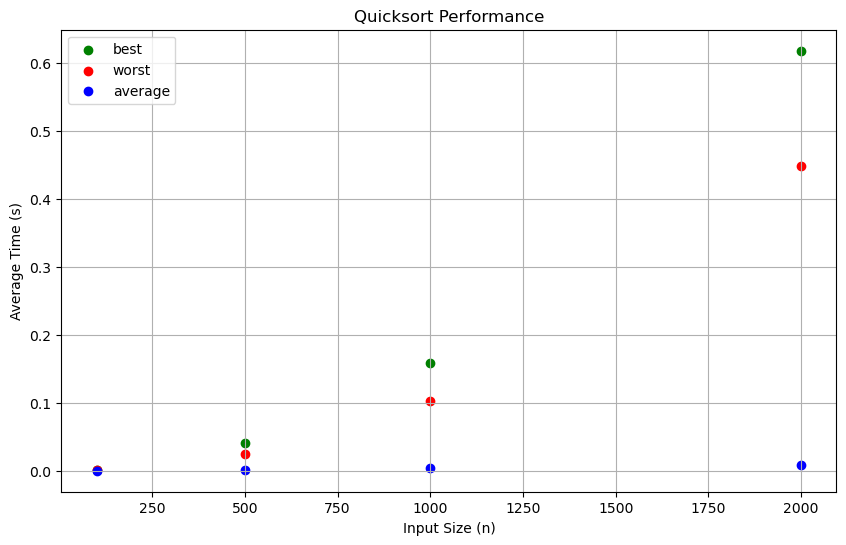

In [4]:
import random
import time
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

def generate_array(size, case='average'):
    if case == 'best':
        return list(range(1, size + 1))
    elif case == 'worst':
        return list(range(size, 0, -1))
    else:
        return [random.randint(1, 1000) for _ in range(size)]

def benchmark(sort_func, cases, sizes):
    results = {case: {size: [] for size in sizes} for case in cases}
    for case in cases:
        for size in sizes:
            for _ in range(5):  # Repeat each case multiple times
                arr = generate_array(size, case)
                start_time = time.time()
                sort_func(arr, 0, size - 1)
                end_time = time.time()
                elapsed_time = end_time - start_time
                results[case][size].append(elapsed_time)
    return results

def plot_results(results):
    plt.figure(figsize=(10, 6))
    colors = {'average': 'blue', 'worst': 'red', 'best': 'green'}
    for case, data in results.items():
        for size, times in data.items():
            avg_time = sum(times) / len(times)
            plt.scatter(size, avg_time, color=colors[case], label=case if size == sizes[-1] else None)
    plt.xlabel('Input Size (n)')
    plt.ylabel('Average Time (s)')
    plt.title('Quicksort Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    sizes = [100, 500, 1000, 2000]  # Input sizes
    cases = ['best', 'worst', 'average']
    
    results = benchmark(quicksort, cases, sizes)
    plot_results(results)
